# Analyzing The Player Performances 

In [23]:
#Importing Libraries
import numpy as np #To handle Mathematical calculations
import matplotlib.pyplot as plt #To plot charts 
import matplotlib.cm as cm
import mpldatacursor
%matplotlib inline
import pandas as pd #TO import and manage datasets
import glob
import os

# Importing league points table data (2009-2018)

In [24]:
# path = r'C:\Projects\FYP\Datasets\Whoscored\Points-Table' # use your path
path = r'../Datasets/Whoscored/Points-Table' # use your path
folder = glob.glob(path + "/*.csv")

list = []

for file in folder:
#     df = pd.read_csv(filename, index_col=None, header=0)
    individualTeamDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[3]
    individualTeamDataframe['League'] = league
    individualTeamDataframe['Season'] = int(season)
    list.append(individualTeamDataframe)

# combinedDataframe = pd.concat(li, axis=0, ignore_index=True)
combinedTeamDataframe = pd.concat(list)



In [25]:
combinedTeamDataframe

,Rank,Team,Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,League,Season
0,1,Bayern Munich,34.0,20.0,10.0,4.0,72.0,31.0,41.0,70.0,Bundesliga,2009
1,2,Schalke 04,34.0,19.0,8.0,7.0,53.0,31.0,22.0,65.0,Bundesliga,2009
2,3,Werder Bremen,34.0,17.0,10.0,7.0,71.0,40.0,31.0,61.0,Bundesliga,2009
3,4,Bayer Leverkusen,34.0,15.0,14.0,5.0,65.0,38.0,27.0,59.0,Bundesliga,2009
4,5,Borussia Dortmund,34.0,16.0,9.0,9.0,54.0,42.0,12.0,57.0,Bundesliga,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
15,16,Fiorentina,38.0,8.0,17.0,13.0,47.0,45.0,2.0,41.0,SerieA,2018
16,17,Genoa,38.0,8.0,14.0,16.0,39.0,57.0,-18.0,38.0,SerieA,2018
17,18,Empoli,38.0,10.0,8.0,20.0,51.0,70.0,-19.0,38.0,SerieA,2018
18,19,Frosinone,38.0,5.0,10.0,23.0,29.0,69.0,-40.0,25.0,SerieA,2018


# Importing player data (2009-2018)

In [26]:
#Combining All Offensive/Attacking Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Offensive*.csv")

list = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.at[index, 'Age'] = age
        
        #Cleaning Appearences/Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.at[index, 'Apps'] = apps
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.at[index, 'Apps'] = apps
            
        #Cleaning Position column
        if ',' in row["Position"]:
            primary = row["Position"].split(",")[0]
            if '(' in primary:
                primary = primary.split("(")[0]
                individualOffensivePlayerDataframe.at[index, 'Position'] = primary
            else:
                individualOffensivePlayerDataframe.at[index, 'Position'] = primary
        elif '(' in row["Position"]:
            primary = row["Position"].split("(")[0]
            individualOffensivePlayerDataframe.at[index, 'Position'] = primary
            
    list.append(individualOffensivePlayerDataframe)

combinedOffensivePlayerDataframe = pd.concat(list)

In [27]:
#Combining All Defensive Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Defensive*.csv")

list = []

for file in folder:
    individualDefensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualDefensivePlayerDataframe['League'] = league
    individualDefensivePlayerDataframe['Season'] = season
    for index, row in individualDefensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualDefensivePlayerDataframe.at[index, 'Age'] = age
        
        #Cleaning Appearences(Apps) column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualDefensivePlayerDataframe.at[index, 'Apps'] = apps
        else :
            apps = int(row["Apps"])
            individualDefensivePlayerDataframe.at[index, 'Apps'] = apps
            
        #Cleaning Position column  
        if ',' in row["Position"]:
            primary = row["Position"].split(",")[0]
            if '(' in primary:
                primary = primary.split("(")[0]
                individualDefensivePlayerDataframe.at[index, 'Position'] = primary
            else:
                individualDefensivePlayerDataframe.at[index, 'Position'] = primary
        elif '(' in row["Position"]:
            primary = row["Position"].split("(")[0]
            individualDefensivePlayerDataframe.at[index, 'Position'] = primary
    
    list.append(individualDefensivePlayerDataframe)

combinedDefensivePlayerDataframe = pd.concat(list)

In [28]:
#Combining All Passing Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Passing*.csv")

list = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.at[index, 'Age'] = age
        
        #Cleaning Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.at[index, 'Apps'] = apps
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.at[index, 'Apps'] = apps
           
        #Cleaning Position column
        if ',' in row["Position"]:
            primary = row["Position"].split(",")[0]
            if '(' in primary:
                primary = primary.split("(")[0]
                individualOffensivePlayerDataframe.at[index, 'Position'] = primary
            else:
                individualOffensivePlayerDataframe.at[index, 'Position'] = primary
        elif '(' in row["Position"]:
            primary = row["Position"].split("(")[0]
            individualOffensivePlayerDataframe.at[index, 'Position'] = primary
    
    list.append(individualOffensivePlayerDataframe)

combinedPassingPlayerDataframe = pd.concat(list)


In [29]:
#Combining All Summary Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Summary*.csv")

list = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.at[index, 'Age'] = age
        
        #Cleaning Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.at[index, 'Apps'] = apps
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.at[index, 'Apps'] = apps
            
        #Cleaning Position column    
        if ',' in row["Position"]:
            primary = row["Position"].split(",")[0]
            if '(' in primary:
                primary = primary.split("(")[0]
                individualOffensivePlayerDataframe.at[index, 'Position'] = primary
            else:
                individualOffensivePlayerDataframe.at[index, 'Position'] = primary
        elif '(' in row["Position"]:
            primary = row["Position"].split("(")[0]
            individualOffensivePlayerDataframe.at[index, 'Position'] = primary
            
    
    list.append(individualOffensivePlayerDataframe)

combinedSummaryPlayerDataframe = pd.concat(list)

# Combining all various statistics of players 

In [30]:
#combining all the DFs'

combinedPlayerDataframe = pd.concat([combinedOffensivePlayerDataframe, combinedDefensivePlayerDataframe, combinedPassingPlayerDataframe, combinedSummaryPlayerDataframe], axis=1)

combinedPlayerDataframe = combinedPlayerDataframe.loc[:,~combinedPlayerDataframe.columns.duplicated()]

#Removing all the goal keepers to test whether it improves the accuracy of the model.
# combinedFieldPlayersDf = combinedPlayerDataframe[combinedPlayerDataframe.Position != 'GK']

#Removing field players who have played less than 10 matches
#combinedProperFieldPlayersDf = combinedFieldPlayersDf[~(combinedFieldPlayersDf['Apps'] < 8)]  

In [31]:
combinedPlayerDataframe

,Name,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,...,Passes per game,Pass success percentage,Crosses per game,Long balls per game,Through balls per game,Total Goals,Yellow cards,Red cards,Aerials won per game,Man of the match
0,Arjen Robben,Bayern Munich,26,M,18,1779,16,6,3.4,1.8,...,34.3,80.2,1.5,2,0.2,16,1,-,0.4,8
1,Stefan Kießling,Bayer Leverkusen,26,FW,33,2924,21,5,3,1.6,...,32.5,72.4,0.2,0.4,0.1,21,3,-,2.1,6
2,Zvjezdan Misimovic,Wolfsburg,28,AM,31,2768,10,13,2.4,3.3,...,51.1,77.5,2.5,5.7,0.5,10,7,-,0.2,8
3,Edin Dzeko,Wolfsburg,24,FW,33,3003,22,7,4.5,1.1,...,19.5,70.7,0.2,1.1,0.1,22,4,-,0.7,6
4,Claudio Pizarro,Werder Bremen,31,AM,23,2130,16,2,2.6,1.3,...,24.2,75.5,0.1,0.8,-,16,4,-,0.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Nicky Medja Beloko,Fiorentina,19,Midfielder,0,45,-,-,-,-,...,10,50,-,-,-,-,1,-,1,-
566,Stephy Mavididi,Juventus,21,Forward,0,21,-,-,-,-,...,4,100,-,-,-,-,-,-,-,-
567,Guido Guerrieri,Lazio,23,Goalkeeper,1,90,-,-,-,-,...,27,66.7,-,4,-,-,-,-,-,-
568,Carlo Pinsoglio,Juventus,29,Goalkeeper,1,90,-,-,-,-,...,30,70,-,9,-,-,-,-,-,-


In [32]:
combinedPlayerDataframe = combinedPlayerDataframe.replace("-", 0)

# Normalizing player position column

In [33]:
combinedPlayerDataframe.Position.unique()

array(['M', 'FW', 'AM', 'D', 'Midfielder', 'GK', 'DMC', 'Forward',
       'Defender', 'Goalkeeper', 'midfielder', 'forward'], dtype=object)

In [34]:
#Replacing the players poistions shortnames
combinedPlayerDataframe['Position'].replace(['M'], 'Midfielder', regex=False, inplace=True)
combinedPlayerDataframe['Position'].replace(['midfielder'], 'Midfielder', regex=False, inplace=True)
combinedPlayerDataframe['Position'].replace(['FW'], 'Forward', regex=False, inplace=True)
combinedPlayerDataframe['Position'].replace(['forward'], 'Forward', regex=False, inplace=True)
combinedPlayerDataframe['Position'].replace(['AM'], 'Attacking Midfielder', regex=False, inplace=True)
combinedPlayerDataframe['Position'].replace(['D'], 'Defender', regex=False, inplace=True)
combinedPlayerDataframe['Position'].replace(['GK'], 'Goalkeeper', regex=False, inplace=True)
combinedPlayerDataframe['Position'].replace(['DMC'], 'Defensive Midfielder', regex=False, inplace=True)

In [35]:
combinedPlayerDataframe.Position.unique()

array(['Midfielder', 'Forward', 'Attacking Midfielder', 'Defender',
       'Goalkeeper', 'Defensive Midfielder'], dtype=object)

# Converting to a pivot table (to make seasonal comparisons)

In [36]:
pivot_table_columns = combinedPlayerDataframe.columns.tolist()
pivot_table_columns.remove("Name")
pivot_table_columns.remove("Season")

In [37]:
combinedPlayerDataframePivot = combinedPlayerDataframe.pivot_table(index=['Name'], columns=['Season'],
                     values = pivot_table_columns, aggfunc='first').reset_index()

In [38]:
combinedPlayerDataframePivot

Name Aerials won per game                            
Season                                       2009 2010 2011 2012 2013 2014   
0            Aaron Cresswell                  NaN  NaN  NaN  NaN  NaN  1.4  \
1               Aaron Hughes                  2.4  2.8  1.8  2.9  3.2  NaN   
2                 Aaron Hunt                  0.2  0.2  0.6  0.6  1.1  0.4   
3               Aaron Lennon                    0  0.1  0.2  0.2  0.1  0.2   
4           Aaron Leya Iseka                  NaN  NaN  NaN  NaN  NaN  NaN   
...                      ...                  ...  ...  ...  ...  ...  ...   
9146    Ögmundur Kristinsson                  NaN  NaN  NaN  NaN  NaN  NaN   
9147             Ömer Toprak                  0.2  0.6    1  1.7  3.3  3.8   
9148          Özkan Yildirim                  NaN  NaN  NaN  0.5  0.2    1   
9149            Ørjan Nyland                  NaN  NaN  NaN  NaN  NaN  NaN   
9150            Ümit Korkmaz                  0.2    0  NaN  NaN  NaN  NaN   

                       ... Yellow cards                                      
Season 2015 2016 2017  ...         2009 2010 2011 2012 2013 2014 2015 2016   
0       1.1  1.4  1.6  ...          NaN  NaN  NaN  NaN  NaN    5    1    2  \
1       NaN  NaN  NaN  ...            2    0    0    1    2  NaN  NaN  NaN   
2       1.1  0.6  0.7  ...            3    2    0    3    2    1    2    3   
3         0    0  0.5  ...            1    1    1    1    1    2    1    0   
4       NaN  0.8  NaN  ...          NaN  NaN  NaN  NaN  NaN  NaN  NaN    0   
...     ...  ...  ...  ...          ...  ...  ...  ...  ...  ...  ...  ...   
9146    NaN  NaN  0.5  ...          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
9147    2.9  2.9  3.2  ...            3    2    5    8    5   10    2    6   
9148      1  NaN  NaN  ...          NaN  NaN  NaN    0    0    0    0  NaN   
9149      0  0.3  NaN  ...          NaN  NaN  NaN  NaN  NaN  NaN    0    0   
9150    NaN  NaN  NaN  ...            2    0  NaN  NaN  NaN  NaN  NaN  NaN   

                  
Season 2017 2018  
0         7    1  
1       NaN  NaN  
2         1  NaN  
3         2    1  
4       NaN    2  
...     ...  ...  
9146      0  NaN  
9147      1    0  
9148    NaN  NaN  
9149    NaN  NaN  
9150    NaN  NaN  

[9151 rows x 331 columns]

In [39]:
# This code accesses the number of appearances of a player named 'Aaron Hughes' in the year 2018 from a pivot table called combinedPlayerDataframePivot.
combinedPlayerDataframePivot.loc[combinedPlayerDataframePivot['Name'] == 'Aaron Hughes']['Apps']['2018'].tolist()[0]

nan

# Flattening the DF for Data manipulation

In [40]:
combinedFlattenedDataFrame = combinedPlayerDataframePivot
combinedFlattenedDataFrame.columns = combinedFlattenedDataFrame.columns.map('_'.join)
combinedFlattenedDataFrame.rename(columns={'Name_':'Name'}, inplace=True)
combinedFlattenedDataFrame

,Name,Aerials won per game_2009,Aerials won per game_2010,Aerials won per game_2011,Aerials won per game_2012,Aerials won per game_2013,Aerials won per game_2014,Aerials won per game_2015,Aerials won per game_2016,Aerials won per game_2017,...,Yellow cards_2009,Yellow cards_2010,Yellow cards_2011,Yellow cards_2012,Yellow cards_2013,Yellow cards_2014,Yellow cards_2015,Yellow cards_2016,Yellow cards_2017,Yellow cards_2018
0,Aaron Cresswell,NaN,NaN,NaN,NaN,NaN,1.4,1.1,1.4,1.6,...,NaN,NaN,NaN,NaN,NaN,5,1,2,7,1
1,Aaron Hughes,2.4,2.8,1.8,2.9,3.2,NaN,NaN,NaN,NaN,...,2,0,0,1,2,NaN,NaN,NaN,NaN,NaN
2,Aaron Hunt,0.2,0.2,0.6,0.6,1.1,0.4,1.1,0.6,0.7,...,3,2,0,3,2,1,2,3,1,NaN
3,Aaron Lennon,0,0.1,0.2,0.2,0.1,0.2,0,0,0.5,...,1,1,1,1,1,2,1,0,2,1
4,Aaron Leya Iseka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9146,Ögmundur Kristinsson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
9147,Ömer Toprak,0.2,0.6,1,1.7,3.3,3.8,2.9,2.9,3.2,...,3,2,5,8,5,10,2,6,1,0
9148,Özkan Yildirim,NaN,NaN,NaN,0.5,0.2,1,1,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN
9149,Ørjan Nyland,NaN,NaN,NaN,NaN,NaN,NaN,0,0.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN


# Data PreProcessing

In [41]:
#Removing players who have played less than 10 games in last season
minimum_no_of_games_played = 10
combinedFlattenedDataFrame = combinedFlattenedDataFrame[combinedFlattenedDataFrame['Apps_2018'] > minimum_no_of_games_played]

#Removing players who haven't played in the recent past 2 seasons
#Removing players who have had 0 rating the past season
rating_the_seasons = ['Rating_2009', 'Rating_2010', 'Rating_2011', 'Rating_2012', 'Rating_2013', 'Rating_2014','Rating_2015', 'Rating_2016', 'Rating_2017', 'Rating_2018']
players_last_seasons = combinedFlattenedDataFrame[rating_the_seasons[-2:]].isnull().any(axis=1)
players_with_zero_rating = combinedFlattenedDataFrame[rating_the_seasons[-1]] == 0 
players_to_remove = players_last_seasons | players_with_zero_rating
cleanedDataFrame = combinedFlattenedDataFrame[~players_to_remove]

# Preview data
cleanedDataFrame.head()

,Name,Aerials won per game_2009,Aerials won per game_2010,Aerials won per game_2011,Aerials won per game_2012,Aerials won per game_2013,Aerials won per game_2014,Aerials won per game_2015,Aerials won per game_2016,Aerials won per game_2017,...,Yellow cards_2009,Yellow cards_2010,Yellow cards_2011,Yellow cards_2012,Yellow cards_2013,Yellow cards_2014,Yellow cards_2015,Yellow cards_2016,Yellow cards_2017,Yellow cards_2018
0,Aaron Cresswell,NaN,NaN,NaN,NaN,NaN,1.4,1.1,1.4,1.6,...,NaN,NaN,NaN,NaN,NaN,5,1,2,7,1
3,Aaron Lennon,0,0.1,0.2,0.2,0.1,0.2,0,0,0.5,...,1,1,1,1,1,2,1,0,2,1
6,Aaron Meijers,NaN,NaN,NaN,NaN,1,1.4,1.3,1.3,1.6,...,NaN,NaN,NaN,NaN,3,5,7,3,8,8
8,Aaron Mooy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4
9,Aaron Ramsey,0.7,0,0.3,0.4,0.5,0.6,0.9,0.3,0.4,...,0,1,3,5,3,6,4,3,0,0


# Data Analyzing

# Analyzing the Player Growth and Decline

In [42]:
#Identifying the players who are continously growing each season

progressive_columns = ['Name', 
                    'Growth_2009', 'Growth_2010', 'Growth_2011', 'Growth_2012', 'Growth_2013', 'Growth_2014', 
                    'Growth_2015', 'Growth_2016', 'Growth_2017']

progressive_columns.extend(rating_the_seasons)

players_positive_growth = []

for index in cleanedDataFrame.index:
    
    player = cleanedDataFrame.loc[index]

    players_rating = player[rating_the_seasons].dropna()
    
    present_growth = [0] * (10 - len(players_rating))
    
    #calculate growth difference between seasons (next season rating - current season rating)
    present_growth.extend([players_rating[b+1] - players_rating[b] for b in range(len(players_rating) - 1)])
    
    #calculate the total number of negative growth (decline) seasons
    total_negative_growth_seasons = sum(np.array(present_growth) < 0)
    
    #adding players who never had a decline in their whole career
    if total_negative_growth_seasons == 0:
        row = [player['Name']]
        row.extend(present_growth)
        row.extend(player[rating_the_seasons])
        players_positive_growth.append(row)

# Creating a dataframe to preview it
positivePlayersDf = pd.DataFrame(data=players_positive_growth, columns=progressive_columns)
print("Number of players with positive trend:", len(positivePlayersDf))
positivePlayersDf.head()

Number of players with positive trend: 175


,Name,Growth_2009,Growth_2010,Growth_2011,Growth_2012,Growth_2013,Growth_2014,Growth_2015,Growth_2016,Growth_2017,Rating_2009,Rating_2010,Rating_2011,Rating_2012,Rating_2013,Rating_2014,Rating_2015,Rating_2016,Rating_2017,Rating_2018
0,Abdenasser El Khayati,0,0,0,0,0.0,0.0,0.00,0.43,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.68,7.11,7.39
1,Adrien Hunou,0,0,0,0,0.0,0.0,0.19,0.06,0.18,NaN,NaN,NaN,NaN,6.19,NaN,NaN,6.38,6.44,6.62
2,Adrien Silva,0,0,0,0,0.0,0.0,0.00,0.00,0.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.40,6.87
3,Albert Gudmundsson,0,0,0,0,0.0,0.0,0.00,0.00,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.55,6.68
4,Aleix García,0,0,0,0,0.0,0.0,0.30,0.25,0.05,NaN,NaN,NaN,NaN,NaN,5.96,NaN,6.26,6.51,6.56


NameError: name 'artists' is not defined

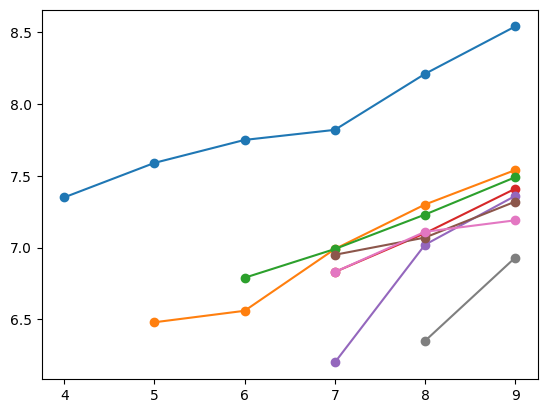

In [43]:
#Plot players who are contantly growing season by season

seasons = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

names = ['André Silva',
         'Mathys Tel',
         'Denzel Dumfries',
         'Frenkie de Jong',
         'Hakim Ziyech',
         'Joshua Kimmich',
         'Kylian Mbappe',
         'Matthijs de Ligt',
         'Oleksandr Zinchenko',
         'Trent Alexander-Arnold']
# names = []

#plot only the players listed above
if len(names) > 0:
    data = positivePlayersDf[positivePlayersDf['Name'].isin(names)]
    data = data.sort_values(['Rating_2018'], ascending=False)
    names = data['Name'].values
    data = data.values[:, 10:]
    
#plot al the players if no custom player list given
else:
    data = positivePlayersDf.values[:, 10:]

# Plot data
fig, ax = plt.subplots()
for i_row, row in enumerate(data):
    if len(names) > 0:
        current_player_name = names[i_row]
    else:
        current_player_name = positivePlayersDf.iloc[i_row, :]['Name']
        
    ax.plot(row, marker='o', alpha=1.0, label=current_player_name)
    
# Initialize interactive tooltip
mpldatacursor.datacursor(artists=artists, formatter='{label}'.format)

# Add title and labels
plt.xticks(range(len(seasons)), seasons)
plt.title('Players with Increasing Seasonal Rating')
plt.ylabel('WhoScored.com Rating')
plt.gcf().set_size_inches(15, 10)
if len(names) > 0:
    plt.legend()